In [57]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import medfilt

In [55]:
'''
Peakfinder function.
Inputs: data - array of values in which to find peaks
        err  - array of associated error values to data
        threshold - level of standard deviation required to be defined as a peak
Description:
        Detects peaks in a 1d array with associated errors. First determines mean and standard deviation (std)
        in 2000 index window around each index, then checks if the associated value is greater than mean+err+threshold*std.
        If the value is then the value and its location in the array are appended to the output peaks array.
Outputs:
        peaks - 2d array holding locations and heights of detected peaks

''';
def find_p(data,err,threshold):
    #initialize 2d-array
    peaks=[]
    peaks.append([]);peaks.append([])
    
    #zero pad both data and err arrays for window calculations
    data=(np.pad(data,1000,mode='constant'))
    err =(np.pad(err,1000,mode='constant'))
    
    #iterate over array length
    for i in range(len(data)):
        #find windowed mean and std
        mean=np.mean(data[i-1000:i+1000])
        std=np.std(data[i-1000:i+1000])
        
        #check if peak conditions are true
        if(data[i]>mean+threshold*std+err[i] and data[i]==np.max(data[i-10:i+10])):
            #append true location of peak pre padding
            peaks[0].append(i-1000)
            #append value of peak
            peaks[1].append(data[i])
            
    return peaks

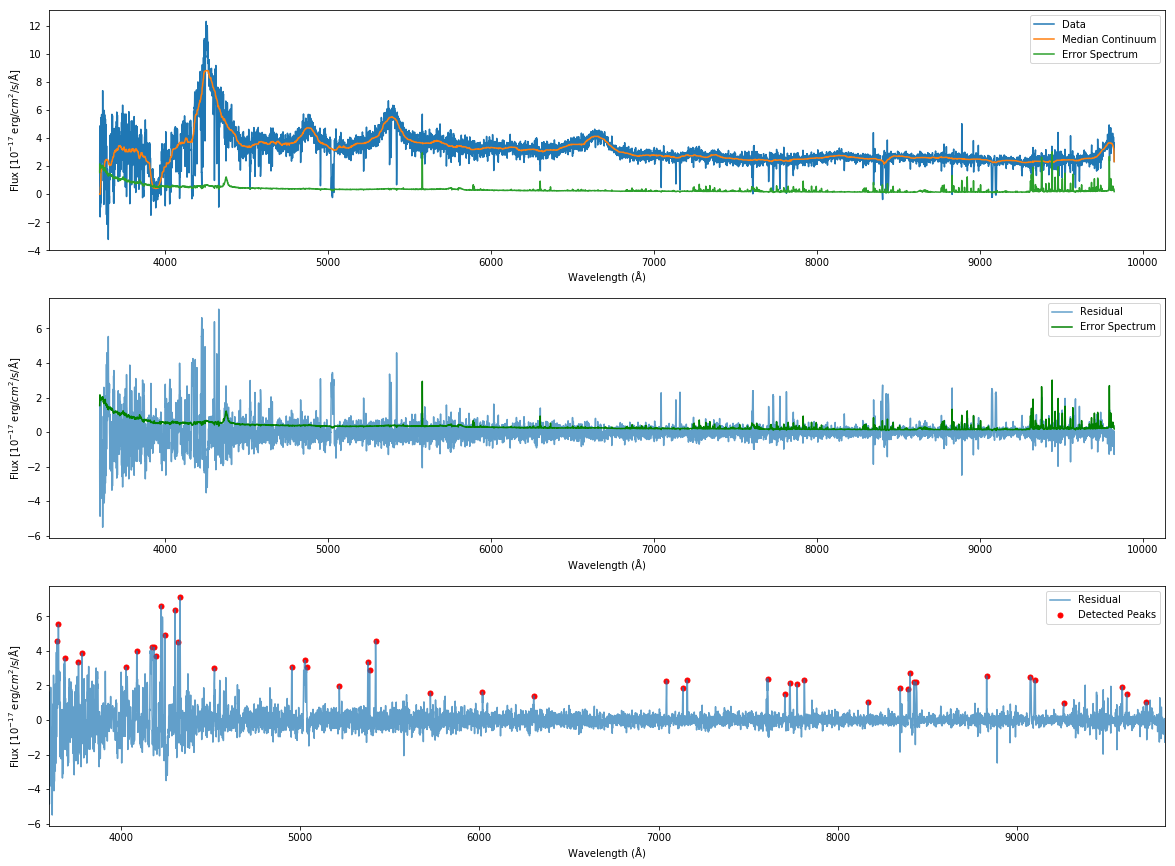

In [63]:
#lets bring in an actual MgII spectra

#filename setup
dirname = "/global/cfs/cdirs/desi/spectro/redux/daily/tiles/68002/20200315"
filename = "coadd-{}-{}-{}.fits".format(7, 68002, 20200315)

#open paths
specfile = os.path.join(dirname, filename)
specobj = desispec.io.read_spectra(specfile)

#define x and y spaces (flux and error)
x_spc = specobj.wave["brz"]
y_flux = specobj.flux["brz"][293]
y_err=1/np.sqrt(specobj.ivar["brz"][293])

#boxcar median continuum estimate
cont_est = medfilt(y_flux,79)
#calculate residual
bc_residual = cont_est-y_flux

#qso spec and contiunuum est.
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
plt.plot(x_spc,y_flux,label='Data')
plt.plot(x_spc,cont_est,label='Median Continuum')
plt.plot(x_spc,y_err,label='Error Spectrum')
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')

plt.subplot(3,1,2)
plt.plot(x_spc,bc_residual,label='Residual',alpha=0.7)
plt.plot(x_spc,y_err,label='Error Spectrum',c='g')
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')

#initial
bc_peaks=find_p(bc_residual,y_err,2)

plt.subplot(3,1,3)
plt.scatter(x_spc[bc_peaks[0]],bc_peaks[1],c = 'r',s = 25,label='Detected Peaks')
plt.plot(x_spc, bc_residual, c='C0',label='Residual',alpha=0.7)
plt.xlim(min(x_spc),max(x_spc))
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
plt.show()